## algorithm design and anlysis-2025 spring  homework 3
**Deadline**：2025.5.14

**name**:


note：
---
1. 带有\*的题目，申请免上课的同学，必须完成，其他同学选作；
2. 请独立完成，如求助了他人或者大模型，请著明，并且不可省略算法分析部分；
4. 如若作答有雷同，全部取消成绩；
3. 需要书面作答的题目，可以通过引用图片的形式添加，但是注意上传项目时包含所引用的图片的源文件；
4. $log_n$ 默认表示$log_2{n}$;

## 问题 1  

请证明基于比较的排序算法计算复杂度下界为$\Omega(nlogn)$

you can refer a handwritten picture, pleas upload the picture in /fig/xxx.png
answer：(有求助于大模型)
(有求助于大模型)
(有求助于大模型)
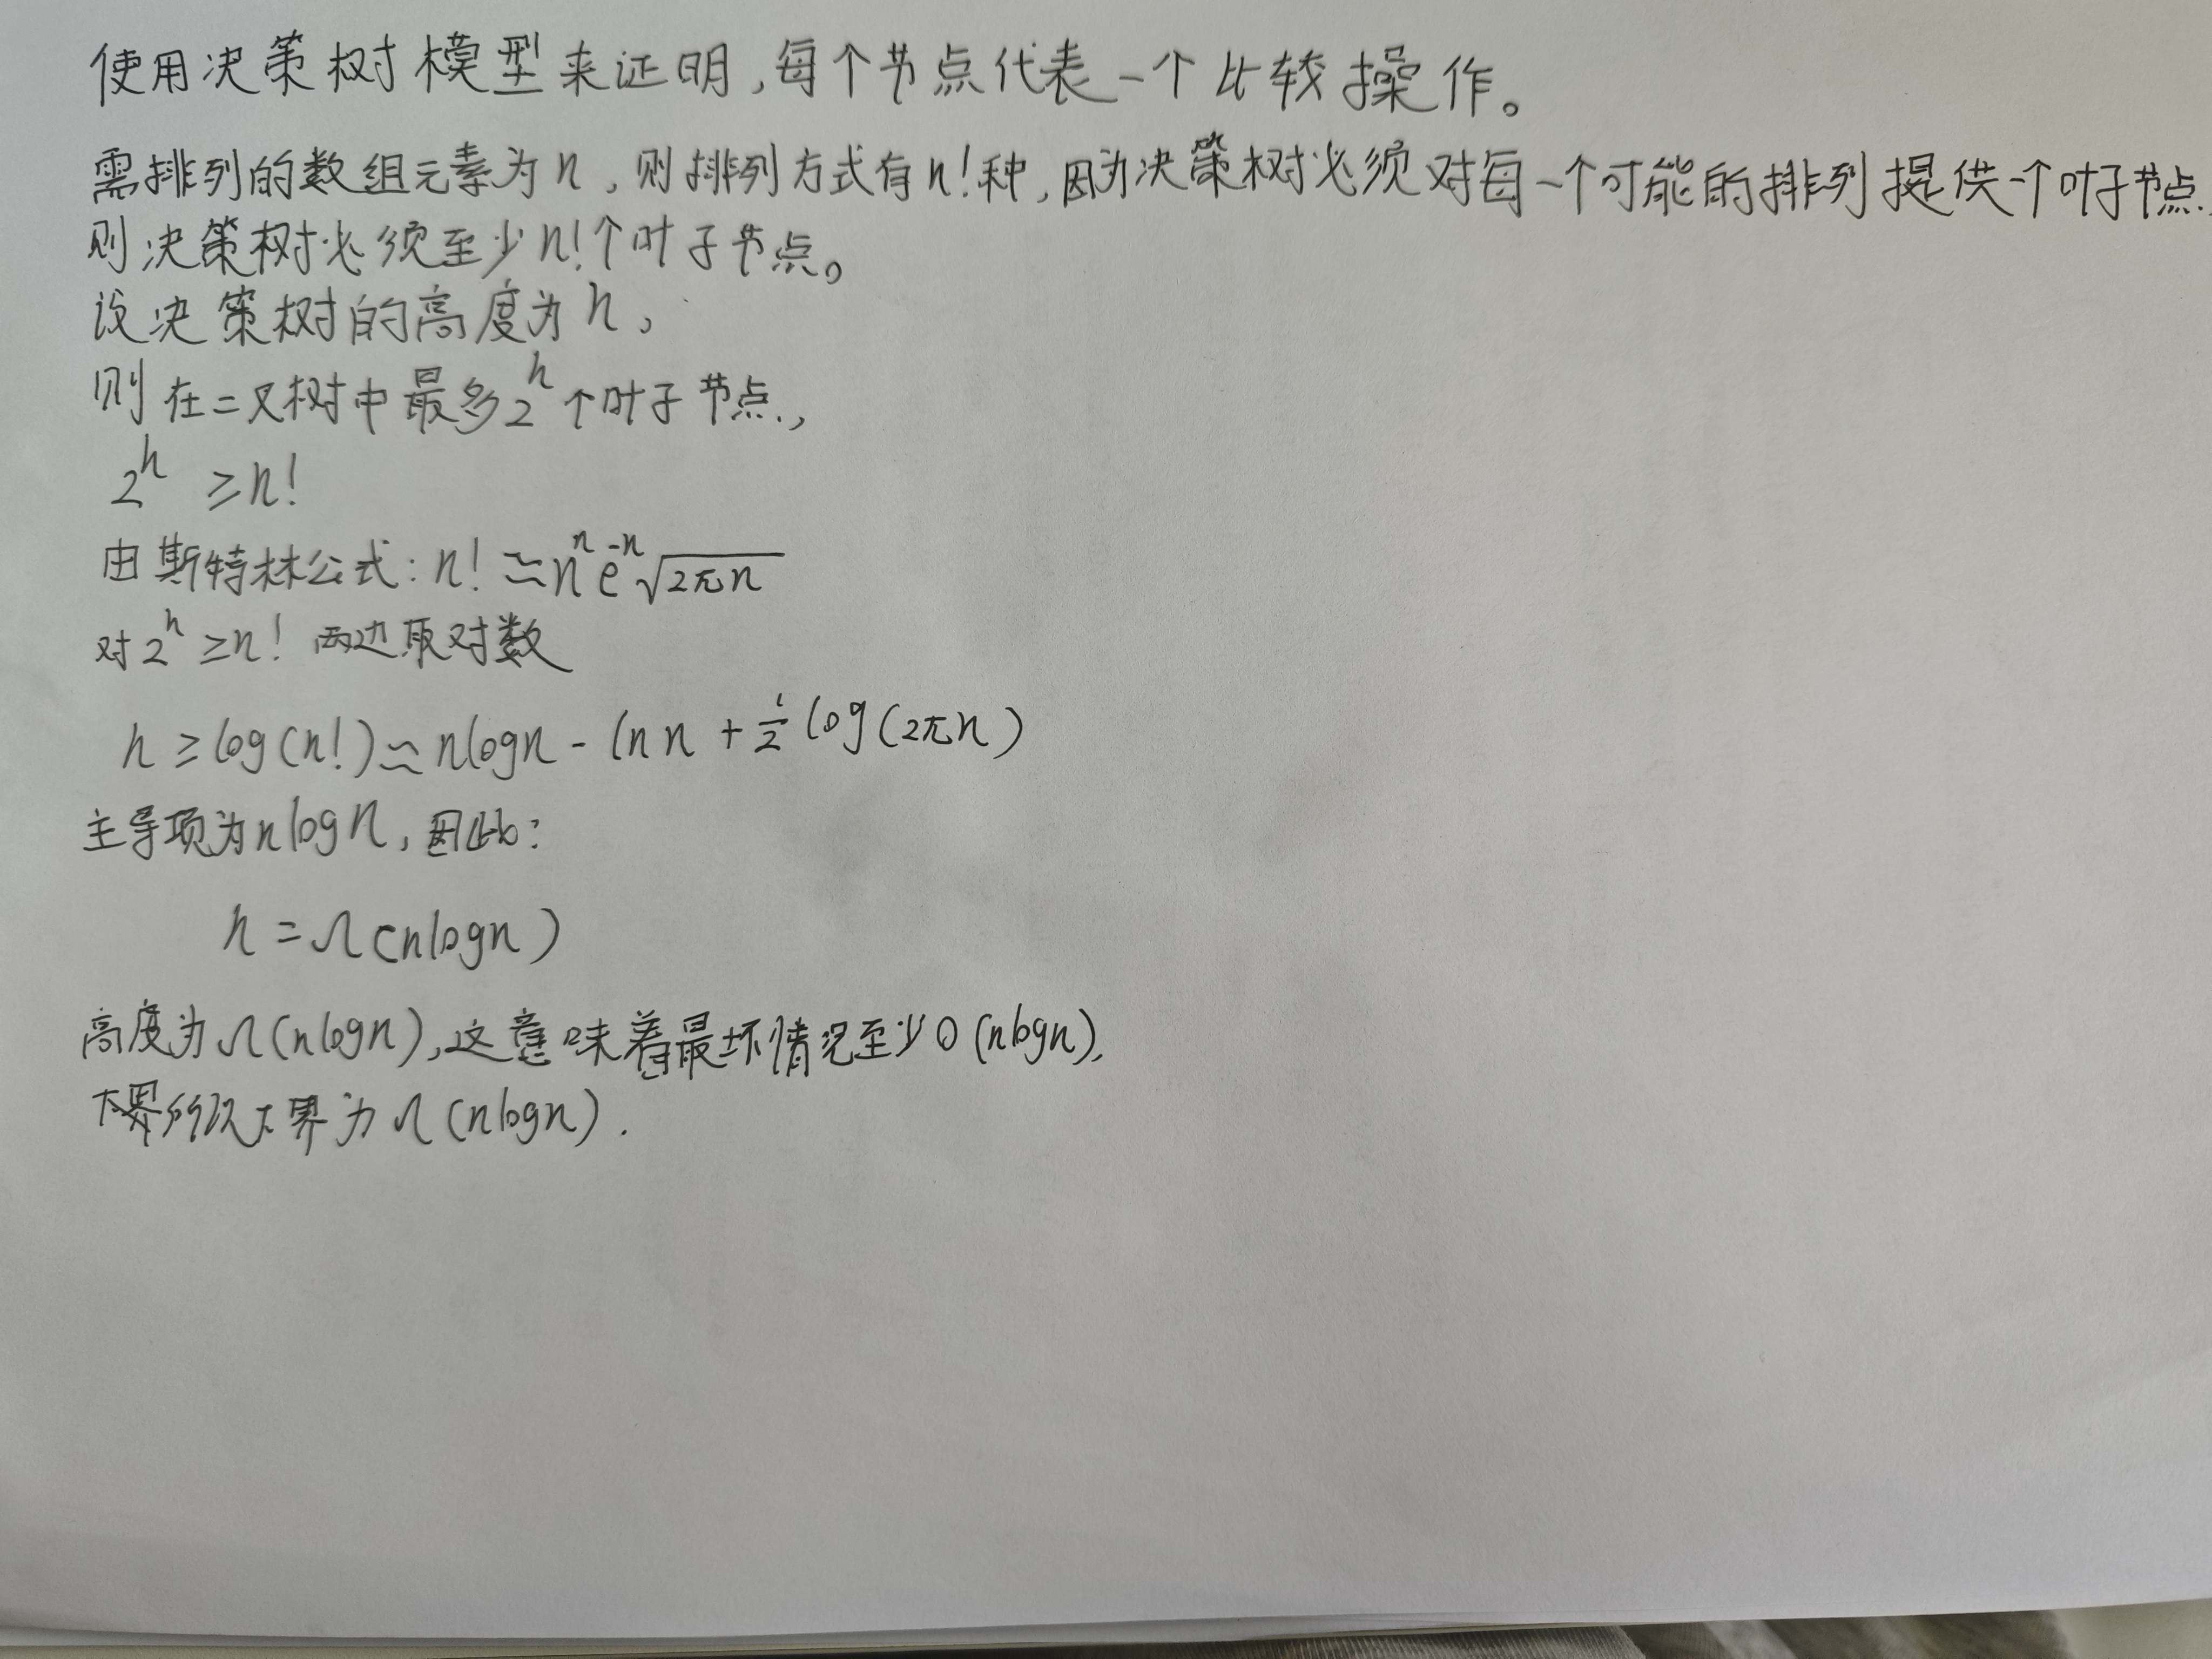

## 问题 2 

构建二叉搜索树

> 1. 给定一个数组 [48, 33, 49, 47, 42, 46, 32], 构建一个二叉搜索树存储这些数据，请**绘制**所构建的**二叉搜索树**（标明结点的值）。
> 2. 从第1问的二叉搜索树中删除33，请**绘制**删除33后的**二叉搜索树**（标明结点的值）

- 推荐使用graphviz包绘制树的结构

you can refer a handwritten picture, pleas upload the picture in /fig/xxx.png
answer：

In [21]:
from graphviz import Digraph

class TreeNode:
    def __init__(self,key):
        self.left = None
        self.right = None
        self.val = key
    
def build_tree(root, key):
    if root is None:
        return TreeNode(key)
    if key < root.val:
        root.left = build_tree(root.left, key)
    else:
        root.right = build_tree(root.right, key)
    return root

def build_dot(root, dot):
    if root is not None:
        dot.node(str(root.val), str(root.val))
        if root.left is not None:
            dot.edge(str(root.val), str(root.left.val))
            build_dot(root.left, dot)
        if root.right is not None:
            dot.edge(str(root.val), str(root.right.val))
            build_dot(root.right, dot)

#第一题
arr = [48, 33, 49, 47, 42, 46, 32]
root = None
for i in arr:
    root = build_tree(root, i)

dot = Digraph()
build_dot(root, dot)
dot.render('bstree', view=True)

#第二题
def delete(root, key):
    if root is None:
        return root
    if key < root.val:
        root.left = delete(root.left, key)
    elif key > root.val:
        root.right = delete(root.right, key)
    else:
        if root.left is None:
            return root.right
        elif root.right is None:
            return root.left
        tmp = find_min(root.right)
        root.val = tmp.val
        root.right = delete(root.right, tmp.val)
    return root


def find_min(root):
    head = root
    while head.left is not None:
        head = head.left
    return head

def inorder(root):
    result = []
    if root:
        result += inorder(root.left)
        result.append(root.val)
        result += inorder(root.right)
    return result


dot1 = Digraph()
delete_root = delete(root, 33)
print(inorder(root))

build_dot(delete_root, dot1)
dot1.render('delete_tree', view=True)
        


[32, 42, 46, 47, 48, 49]


'delete_tree.pdf'

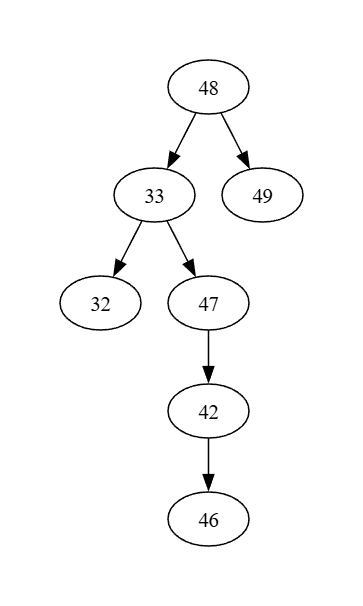

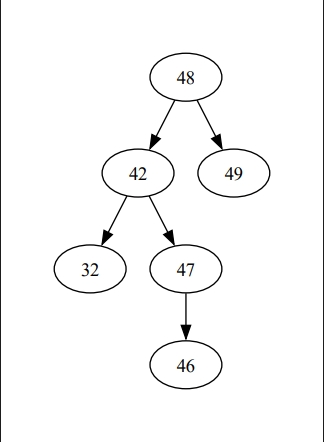

## 问题 3 

> 下面是九门课程的开始和结束时间:
>
> [(9:00,12:30), (11:00,14:00), (13:00, 14:30), (9:00,10:30),(13:00, 14:30),(14:00,16:30), (15:00,16:30), (15:00,16:30), (9:00,10:30)]
>
> 请使用贪婪算法为这九门课分配教室，要求在同一天内安排这些课，并且每个教室同一时间只能安排一门课。

**请问最少需要几间教室，罗列出每个教室安排的课程**

idea：先进行排序，选择一间教室，遍历数组，如果开始时间减去上一门课的结束时间大于0，说明该门课可以分配在该教室，如果小于0，那么需要增加一间教室。

In [ ]:
import heapq

# 定义课程时间列表
courses = [(9*60 + 0, 12*60 + 30), (11*60 + 0, 14*60 + 0), (13*60 + 0, 14*60 + 30), 
           (9*60 + 0, 10*60 + 30), (13*60 + 0, 14*60 + 30), (14*60 + 0, 16*60 + 30), 
           (15*60 + 0, 16*60 + 30), (15*60 + 0, 16*60 + 30), (9*60 + 0, 10*60 + 30)]

# 按照开始时间排序
courses.sort()

# 最小堆，存储每间教室的最后一门课的结束时间和教室编号
heap = []
room_schedule = {}
room_number = 1

for start, end in courses:
    if heap and heap[0][0] <= start:
        # 如果堆顶的教室可以安排这门课
        last_end, room = heapq.heappop(heap)
        room_schedule[room].append((start // 60, start % 60, end // 60, end % 60))
        heapq.heappush(heap, (end, room))
    else:
        # 需要新增一间教室
        room_schedule[room_number] = [(start // 60, start % 60, end // 60, end % 60)]
        heapq.heappush(heap, (end, room_number))
        room_number += 1

# 输出结果
min_rooms = len(heap)
print(f"最少需要 {min_rooms} 间教室")

for room, schedule in room_schedule.items():
    print(f"教室 {room} 的课程安排:")
    for start_hour, start_minute, end_hour, end_minute in schedule:
        print(f"  从 {start_hour:02d}:{start_minute:02d} 到 {end_hour:02d}:{end_minute:02d}")

# 算法的时间复杂度为:O(nlogn)，使用使用的是 Python 内置的 sort 方法，其时间复杂度为O(nlogn)，n为课程数量，之后遍历一遍时间复杂度是O(n)，
# heappop 和 heappush操作的时间复杂度是都是O(logk), k是堆的大小,在最坏情况下，每个课程都可能需要新开一间教室，堆的大小最大为n,所以遍历过程中堆操作的总时间复杂度为(nlogn)
# 所以综合时间复杂度应该是O(nlogn)


最少需要 3 间教室
教室 1 的课程安排:
  从 09:00 到 10:30
  从 11:00 到 14:00
  从 14:00 到 16:30
教室 2 的课程安排:
  从 09:00 到 10:30
  从 13:00 到 14:30
  从 15:00 到 16:30
教室 3 的课程安排:
  从 09:00 到 12:30
  从 13:00 到 14:30
  从 15:00 到 16:30


## 问题 4 

> 爬楼梯问题：假设爬楼梯时你每次只能爬一阶或者爬两阶，问爬上n阶的楼梯，你一共有多少种方法

请设计算法完成该问题，分析算法设计思路，计算时间复杂度，并基于python编程实现

idea：动态规划问题，n=1时只有一种方法爬一阶，n=2时有两种方法，爬两次一阶或者爬一次二阶，当n>2时，那么可以从n-1阶爬一阶，从n-2阶爬二阶。
则状态转移方程为d[n] = d[n-1]+d[n-2]

In [ ]:
# add your code here
def climb(n):
    if n == 1:
        return 1
    if n == 2:
        return 2
    d = [0] * (n+1)
    d[1] = 1
    d[2] = 2
    for i in range(3,n+1):
        d[i] = d[i-1] + d[i-2]
    return d[n]

n=7
print(climb(n))

# your algorithm time complexity is: O(n)
# 对n遍历一遍，因此时间复杂度为O(n),用数组存储空间复杂度为S（n）

21


## 问题 5 

> 0-1背包问题：现在有4块大理石，每个大理石对应的重量和价值使用一个元组表示, 即（重量，价值），4块大理石的重量和价值为：[(5,10), (4,40), (6,30), (3, 50)], 假设你有一辆最大承重为9的小推车，请问使用这个小推车装大理石的最大价值为多少

请设计一个算法解决该问题，分析算法设计思路，计算时间复杂度，并基于python编程实现

idea：使用动态规划来解决 0 - 1 背包问题。创建一个二维数组 dp，其中 dp[i][j] 表示前 i 个物品放入容量为 j 的背包中所能获得的最大价值。
当没有物品或者背包容量为 0，dp[i][j] = 0。
对于第 i 个物品，有两种选择，放入背包或者不放入背包。若不放入第 i 个物品，则 dp[i][j] = dp[i - 1][j]。若放入第 i 个物品，背包容量 j 大于等于第 i 个物品的重量 weight[i - 1]，此时 dp[i][j] = dp[i - 1][j - weight[i - 1]] + value[i - 1]。取上述两种选择中的最大值作为 dp[i][j] 的值。

In [ ]:
# add your code here
def max_value(w_v, bag):
    n = len(w_v)
    dp = [[0 for _ in range(bag+1)] for _ in range(n+1)]
    dp[0][0] = 0
    for i in range(1, n+1):
        wt, val = w_v[i-1]
        for j in range(1, bag+1):
            if j < wt:
                dp[i][j] = dp[i-1][j]
            else:
                dp[i][j] = max(dp[i-1][j], dp[i-1][j-wt]+val)
    return dp[n][bag]

w_v = [(5,10), (4,40),(6,30),(3,50)]
value = max_value(w_v, 9)
print(value)

# your algorithm time complexity is:o(m*n)，其中n为物品的数量，m为背包的承重。遍历n遍m的重量。

90


## 问题 6 
给定 `n` 个非负整数表示每个宽度为 `1` 的柱子的高度图，计算按此排列的柱子，下雨之后能接多少雨水。



<div style="text-align:center;width:800px;"> <img alt="" src="./fig/hw3q6.png"> </div>

请分析算法设计思路，计算时间复杂度，并基于python编程实现

idea：对于数组中的每个位置，它能接住的雨水量取决于它左边最高的柱子和右边最高的柱子中较矮的那个，
然后用这个较矮的高度减去当前位置柱子的高度，就得到了当前位置能接住的雨水量。

In [ ]:
# add your code here
def rain(arr):
    if not arr:
        return 0
    
    n = len(arr)
    left_max = [0] * n
    right_max = [0] * n
    water = 0
    
    left_max[0] = arr[0]
    for i in range(1, n):
        left_max[i] = max(left_max[i-1], arr[i])
    
    right_max[n-1] = arr[n-1]
    for i in range(n-2, -1, -1):
        right_max[i] = max(right_max[i+1], arr[i])
    
    for i in range(n):
        water += min(left_max[i], right_max[i]) - arr[i]
    
    return water

arr = [4,2,0,3,2,5]
print(rain(arr))

# your algorithm time complexity is:O(n)
# 分别计算每个位置的左右最大值，再根据这两个最大值计算每个位置能接住的雨水量，最后将所有位置的雨水量相加，就得到了总的雨水量,遍历三次数组时间为3n，则时间复杂度为O(n)

9


## 问题 7 

**股票投资组合优化**： 假设你是一位投资者，想要在不同的股票中分配你的资金，以最大化你的投资回报。每只股票都有不同的预期收益率和风险。你的目标是选择一些股票，使得总投资金额不超过你的预算，并且预期收益最大化。

在这个情况下，你可以将每只股票视为一个“物品”，其重量为投资金额，价值为预期收益率。然后，你可以使用分级背包问题的方法来选择部分股票，以便在预算内获得最大的预期收益。

以下是一个简化的例子：

假设你有以下三只股票可供选择：

1. 股票 A：投资金额 5000 美元，预期收益率 10%
2. 股票 B：投资金额 3000 美元，预期收益率 8%
3. 股票 C：投资金额 2000 美元，预期收益率 12%

请设计算法找到最优投资方案，分析算法设计思路，计算时间复杂度，并基于python编程实现

idea：设dp[i][j]表示前i个等级的物品装入容量为j的背包时能获得的最大价值。将dp[0][j]初始化为0，表示没有物品时价值为0。
对于每个等级i和每个容量j，遍历该等级中的每个物品，如果当前物品的重量小于等于j，则更新dp[i][j]为max(dp[i][j], dp[i-1][j - weight] + value)。

In [ ]:
# add your code here
def max_share(share, money):
    n = len(share)
    money //= 1000
    dp = [[0 for _ in range(money+1)]for _ in range(n + 1)]
    for i in range(1, n+1):
        wt, val = share[i-1]
        wt//= 1000
        for j in range(1,money + 1):
            if j < wt:
                dp[i][j] = dp[i-1][j]
            else:
                dp[i][j] = max(dp[i-1][j], dp[i-1][j-wt] + val)
    return dp[n][money]

share = [(5000,0.1*5000), (3000,3000*0.08), (2000, 2000*0.12)]
print('5000投资的最大收益为',max_share(share, 5000))
print('2000投资的最大收益为',max_share(share,2000))
print('7000投资的最大收益为',max_share(share,7000))

#投资金额相当于重量，收益相当于价值
# your algorithm time complexity is:O(n*m).其中n是股票的数量，m为投资金额，为了时间和空间复杂度更低对m进行了除以1000.遍历了m遍n个物品。

5000投资的最大收益为 500.0
2000投资的最大收益为 240.0
7000投资的最大收益为 740.0


## 问题 8

给你二叉搜索树的根节点 root ，该树中的恰好两个节点的值被错误地交换。请在不改变其结构的情况下，恢复这棵树 。设计算法解决该问题，分析算法设计思路，计算时间复杂度，并基于python编程实现

e.g.:
---
1.

<div style="text-align:center;width:200px;"> <img alt="" src="./fig/hw3q9-1.jpg"> </div>
输入：root = [1,3,null,null,2]， 输出为：[3,1,null,null,2]， 

解释：3 不能是 1 的左孩子，因为 3 > 1 。交换 1 和 3 使二叉搜索树有效。

2.

 <div style="text-align:center;width:200px;"> <img alt="" src="./fig/hw3q9-1.jpg"> </div>
输入： root=[3,1,4,null,null,2]， 输出为：[2,1,4,null,null,3]

解释：2 不能在 3 的右子树中，因为 2 < 3 。交换 2 和 3 使二叉搜索树有效。

idea：核心是要用中序遍历找到顺序错误的两个点进行交换即可，因为题目说明了只有两个点是错误的。


In [ ]:
# add your code here
class TreeNode:
    def __init__(self, key, left=None, right=None):
        self.val = key
        self.left = left
        self.right = right


def insert(root, key):
    if key is None:
        return None
    if root is None:
        return TreeNode(key)
    if key < root.val:
        root.left = insert(root.left, key)
    else:
        root.right = insert(root.right, key)
    return root


def recoverTree(root):
    nodes = []
    # 中序遍历函数
    def inorder(node):
        if node:
            inorder(node.left)
            nodes.append(node)
            inorder(node.right)

    # 执行中序遍历
    inorder(root)
    first, second = None, None
    # 找出错误节点
    for i in range(len(nodes) - 1):
        if nodes[i].val > nodes[i + 1].val:
            if not first:
                first = nodes[i]
            second = nodes[i + 1]

    # 交换两个错误节点的值
    if first and second:
        first.val, second.val = second.val, first.val


def tree_to_list(root):
    """将二叉树转换为包含 null 的数组表示（按层序遍历）"""
    if not root:
        return []
    result = []
    queue = [root]
    while queue:
        node = queue.pop(0)
        if node:
            result.append(node.val)
            queue.append(node.left)
            queue.append(node.right)
        else:
            result.append(None)
    # 去掉末尾多余的 None
    while result and result[-1] is None:
        result.pop()
    return result


def build_tree_from_level_order(arr):
    #根据层序遍历数组构建二叉树
    if not arr or arr[0] is None:
        return None
    root = TreeNode(arr[0])
    queue = [root]
    i = 1
    while queue and i < len(arr):
        node = queue.pop(0)
        if i < len(arr) and arr[i] is not None:
            node.left = TreeNode(arr[i])
            queue.append(node.left)
        i += 1
        if i < len(arr) and arr[i] is not None:
            node.right = TreeNode(arr[i])
            queue.append(node.right)
        i += 1
    return root


def print_level_order(root):
    #按层序遍历打印树
    if not root:
        return
    result = []
    queue = [root]
    while queue:
        node = queue.pop(0)
        if node:
            result.append(node.val)
            queue.append(node.left)
            queue.append(node.right)
        else:
            result.append(None)
    # 去掉末尾多余的 None
    while result and result[-1] is None:
        result.pop()
    print(result)


# 构建错误的二叉搜索树
arr = [1, 3, None, None, 2]
root = build_tree_from_level_order(arr)

# 恢复二叉搜索树
recoverTree(root)

# （中序遍历）
def inorder_traversal(root):
    if root:
        inorder_traversal(root.left)
        print(root.val, end=" ")
        inorder_traversal(root.right)


print()
print_level_order(root)
    
# your algorithm time complexity is:O(n)
#中序遍历：需要遍历树中的所有节点，时间复杂度为O(n)，其中 是树中节点的数量。找出错误节点和交换值：这两个操作的时间复杂度都是 因此，总的时间复杂度为O(n)


[3, 1, None, None, 2]


## 问题 9  

给你一个二叉树的根节点 root ，树中每个节点都存放有一个 0 到 9 之间的数字。每条从根节点到叶节点的路径都代表一个数字：

> 例如，从根节点到叶节点的路径 1 -> 2 -> 3 表示数字 123 。

设计一个算法计算从根节点到叶节点生成的所有数字之和 ，分析算法设计思路，计算时间复杂度，并基于python编程实现

叶节点:是指没有子节点的节点。

e.g.:
---
1.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q10-1.jpg"> </div>

 输入：root = [1,2,3], 输出：25

解释：从根到叶子节点路径 1->2 代表数字 12，1->3 代表数字 13，因此和为 12 + 13 = 25 。

2.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q10-2.jpg"> </div>

 输入：root = [4,9,0,5,1], 输出：1026

解释：从根到叶子节点路径 4->9->5 代表数字 495，4->9->1 代表数字 491，4->0 代表数字 40。因此和为 495 + 491 + 40 = 1026 。

idea：层序遍历通过数组构建原二叉树，然后深度优先算法遍历到叶子结点，每遍历到一个节点，数字应该是*10+当前节点。

In [29]:
# add your code here
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def build_tree_from_level_order(arr):
    #根据层序遍历数组构建二叉树
    if not arr or arr[0] is None:
        return None
    root = TreeNode(arr[0])
    queue = [root]
    i = 1
    while queue and i < len(arr):
        node = queue.pop(0)
        if i < len(arr) and arr[i] is not None:
            node.left = TreeNode(arr[i])
            queue.append(node.left)
        i += 1
        if i < len(arr) and arr[i] is not None:
            node.right = TreeNode(arr[i])
            queue.append(node.right)
        i += 1
    return root

def sumNumbers(root):
    def dfs(node, current_sum):
        if not node:
            return 0
        current_sum = current_sum * 10 + node.val
        if not node.left and not node.right:
            return current_sum
        return dfs(node.left, current_sum) + dfs(node.right, current_sum)

    return dfs(root, 0)

arr = (4,9,0,5,1)
root = build_tree_from_level_order(arr)
print(sumNumbers(root))  

# your algorithm time complexity is:需要遍历二叉树的所有节点，每个节点仅被访问一次，所以时间复杂度为 O(n)其中，n是二叉树的节点数。

1026


## 问题 10  

给你一个二叉树的根节点 root ， 检查它是否轴对称。

1. 分析算法设计思路，计算时间复杂度，并基于python编程实现
2. \* 设计使用递归和迭代两种方法解决这个问题，计算时间复杂度，并基于python编程实现

e.g.:
---
1.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q11-1.png"> </div>

 输入：root = [1,2,2,3,4,4,3]， 输出：true

解释：二叉树 [1,2,2,3,4,4,3] 对称。

2.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q11-2.png"> </div>

 输入：root = [1,2,2,null,3,null,3]， 输出：false

idea:如果两个节点都为空，则它们是对称的；如果其中一个节点为空而另一个不为空，则不对称。可以递归地判断左子树的左节点和右子树的右节点是否对称，以及左子树的右节点和右子树的左节点是否对称。

In [32]:
# add your code here
# 算法思路求助大模型
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def build_tree_from_level_order(arr):
    #根据层序遍历数组构建二叉树
    if not arr or arr[0] is None:
        return None
    root = TreeNode(arr[0])
    queue = [root]
    i = 1
    while queue and i < len(arr):
        node = queue.pop(0)
        if i < len(arr) and arr[i] is not None:
            node.left = TreeNode(arr[i])
            queue.append(node.left)
        i += 1
        if i < len(arr) and arr[i] is not None:
            node.right = TreeNode(arr[i])
            queue.append(node.right)
        i += 1
    return root

def isSymmetric(root):
    def isMirror(left, right):
        if not left and not right:
            return True
        if not left or not right:
            return False
        return (left.val == right.val) and isMirror(left.left, right.right) and isMirror(left.right, right.left)

    if not root:
        return True
    return isMirror(root.left, root.right)


arr = [1, 2, 2, None, 3,None,3]
root = build_tree_from_level_order(arr)#层序遍历构建树结构
print("arr是否对称？",isSymmetric(root))

arr2 = [1,2,2,3,4,4,3]
root1 = build_tree_from_level_order(arr2)
print("arr2是否对称？",isSymmetric(root1))
# your algorithm time complexity is:O(n)
#需要遍历二叉树的所有节点，每个节点仅被访问一次，所以时间复杂度为O(n)，其中N是二叉树的节点数。

arr是否对称？ False
arr2是否对称？ True


## 问题 11  

给你一个由 '1'（陆地）和 '0'（水）组成的的二维网格，请你计算网格中岛屿的数量。岛屿总是被水包围，并且每座岛屿只能由水平方向和/或竖直方向上相邻的陆地连接形成。

此外，你可以假设该网格的四条边均被水包围。

分析算法设计思路，计算时间复杂度，并基于python编程实现

e.g.:
---
1.
输入：grid = [

    ["1","1","1","1","0"],

    ["1","1","0","1","0"], 

    ["1","1","0","0","0"], 

    ["0","0","0","0","0"]  

]

输出：1

2.
输入：grid = [

    ["1","1","0","0","0"],

    ["1","1","0","0","0"],

    ["0","0","1","0","0"],

    ["0","0","0","1","1"]

]

输出：3

idea:1. 遍历二维网格中的每一个单元格。

2. 当遇到值为 '1' 的单元格时，将其视为岛屿的一部分，同时将岛屿数量加 1。

3. 对该单元格启动深度优先搜索，将所有与之相连的 '1'（即同一岛屿的其他部分）标记为已访问（例如将其值改为 '0'），以避免重复计数。

4. 继续遍历剩余的单元格，重复上述步骤，直到遍历完整个网格。

In [ ]:
# add your code here
#算法思路求助于大模型
def numIslands(grid):
    if not grid:
        return 0

    rows = len(grid)
    cols = len(grid[0])
    count = 0

    def dfs(r, c):
        if r < 0 or r >= rows or c < 0 or c >= cols or grid[r][c]!= '1':
            return
        grid[r][c] = '0'
        dfs(r + 1, c)
        dfs(r - 1, c)
        dfs(r, c + 1)
        dfs(r, c - 1)

    for r in range(rows):
        for c in range(cols):
            if grid[r][c] == '1':
                count += 1
                dfs(r, c)

    return count

# 示例 1
grid1 = [
    ["1","1","1","1","0"],
    ["1","1","0","1","0"],
    ["1","1","0","0","0"],
    ["0","0","0","0","0"]
]
print(numIslands(grid1))

# 示例 2
grid2 = [
    ["1","1","0","0","0"],
    ["1","1","0","0","0"],
    ["0","0","1","0","0"],
    ["0","0","0","1","1"]
]
print(numIslands(grid2))
# your algorithm time complexity is:O(m*n)
# 其中  m是网格的行数，n是网格的列数。遍历二维网格中的每一个单元格，每个单元格最多被访问一次

1
3
